# Image Classification Using CNN
#### By The Computer Vision and Intelligence Club (CVI) - IIT Madras



This aim of this Problem Statement is to introduce Deep Learning, which is one of the most used techniques for Computer Vision Application. 
Before beginning go thorugh the following articles:
1. https://www.nature.com/articles/nature14539 : It is fairly easy to follow and provides an excellent overview of the field. (You will need to login with smail to download the pdf.) 

2. http://deeplearning.stanford.edu/tutorial/supervised/MultiLayerNeuralNetworks/ : A short introduction to Multi-layer perceptrons.

3. https://cs231n.github.io/convolutional-networks/ : Introduction to Convolutional Neural Networks. CNNs are generally used for computer vision problems.


This introduction should be sufficient to get you started with this problem statement. If after going through the PS, you guys are interested in further exploring the field, I would suggest the following resources:
1. http://cs231n.stanford.edu/ : Online course by Stanford.
2. http://introtodeeplearning.com/: Video Lectures from MIT
3. https://www.deeplearningbook.org/: Most popular book on Deep Learning


We'll build a CNN using Keras to use it to classify thousands of pictures in 6 different categories.

Sounds like a huge task, but do not worry! Remember to use Google freely to search for any doubts, errors or documentation. This assignment is not only to check your DL skills, but also how you can step up to learn new things on the go using publicly available sources.

Ideally at the end, we expect that you understand the code in EVERY cell

Enter your code between areas surrounded by the following comment design
######### YOUR CODE HERE #########


################################

[Link For The Dataset](https://drive.google.com/uc?id=1Qc66kVqetwJIK7cKXnXxbPJy6gnpRSRI)

The aim of this get you all familiarized with Deep Learning in TensorFlow, a very popular Deep Learning Library (or in general GPU computation library).

Some of the dataloading and preprocessing work has been done, and you guys are expected to fill-in code where you are asked to. 

Before diving into the code ensure that you copy the notebook to your drive (See the option in File Tab) and that the Runtime Type is set to GPU (Runtime tab -> Change runtime type). To see the importance of GPU in deep learning see [this](https://course.fast.ai/gpu_tutorial.html) short article.




First we import the necessary libraries. We recommend that you check out what these libraries are if they seem unfamiliar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

# Downloading the Data and Extracting it

In [2]:
!gdown https://drive.google.com/uc?id=1Qc66kVqetwJIK7cKXnXxbPJy6gnpRSRI
!unzip The_Data.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

Now define the paths to the train test and pred folders

In [3]:
######### YOUR CODE HERE #########
trainpath = '/content/seg_train/'
testpath = '/content/seg_test/'
predpath = '/content/seg_pred/'
##################################

# Data Loading


Now let's first check the Train folder to have a look to its content

In [4]:
for folder in  os.listdir(trainpath + 'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2191 in folder buildings
For training data , found 2271 in folder forest
For training data , found 2404 in folder glacier
For training data , found 2382 in folder street
For training data , found 2274 in folder sea
For training data , found 2512 in folder mountain


Ok, how about the test folder

In [5]:
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 437 in folder buildings
For testing data , found 474 in folder forest
For testing data , found 553 in folder glacier
For testing data , found 501 in folder street
For testing data , found 510 in folder sea
For testing data , found 525 in folder mountain


_____
Now for prediction folder

In [6]:
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 7301


_____

# Checking Images

Now we need to check the images sizes , to know how they look like

Since we have 6 categories , we first need to create a dictionary with their names & indices. This is known as integer encoding. Also create a function to get the code back

In [7]:
code_to_num = {'buildings':0 ,'forest':1, 'glacier':2, 'mountain':3, 'sea':4, 'street':5}
num_to_code = {0:'buildings' ,1:'forest', 2:'glacier', 3:'mountain', 4:'sea', 5:'street'}

def get_code(n) : 
    if n in num_to_code:
        return num_to_code[n]    

def get_num(c):
    if c in code_to_num:
        return code_to_num[c] 

Now how about the images sizes in train folder

In [8]:
size = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(123, 150, 3)        2
(142, 150, 3)        2
(144, 150, 3)        2
(108, 150, 3)        2
(134, 150, 3)        2
(146, 150, 3)        2
(143, 150, 3)        2
(136, 150, 3)        2
(119, 150, 3)        1
(133, 150, 3)        1
(100, 150, 3)        1
(140, 150, 3)        1
(131, 150, 3)        1
(149, 150, 3)        1
(105, 150, 3)        1
(141, 150, 3)        1
(115, 150, 3)        1
(76, 150, 3)         1
(110, 150, 3)        1
(120, 150, 3)        1
(147, 150, 3)        1
(102, 150, 3)        1
(103, 150, 3)        1
(145, 150, 3)        1
(81, 150, 3)         1
(124, 150, 3)        1
(97, 150, 3)         1
dtype: int64

______

Ok, almost all of them are (150,150,3), how about test images ? 

In [9]:
size = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    2993
(72, 150, 3)        1
(110, 150, 3)       1
(76, 150, 3)        1
(141, 150, 3)       1
(81, 150, 3)        1
(149, 150, 3)       1
(131, 150, 3)       1
dtype: int64

Almost same ratios  
Now to prediction images 

In [10]:
size = []
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    7288
(100, 150, 3)       1
(124, 150, 3)       1
(133, 150, 3)       1
(139, 150, 3)       1
(112, 150, 3)       1
(129, 150, 3)       1
(374, 500, 3)       1
(144, 150, 3)       1
(108, 150, 3)       1
(126, 150, 3)       1
(143, 150, 3)       1
(149, 150, 3)       1
(131, 150, 3)       1
dtype: int64

Ok , since almost all of pictures are (150,150,3) , we can use all pictures in our model, after resizing it to a particular size

# Reading Images

Now it's time to read all images & convert it into arrays

First we'll create a variable s , which refer to size , so we can change it easily 

Let's use now size = 100 , so it will be suitable amount to contain accuracy without losing so much time in training

In [11]:
s = 100

Now to read all pictues in six categories in training folder, and use OpenCV to resize it. And not to forget assigning the y value from the predefined function 

In [12]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(get_num(folder))

Great , now how many items in X_train 

In [13]:
print(f'we have {len(X_train)} items in X_train')

we have 14034 items in X_train


Also we have have a look to random pictures in X_train , and to adjust their title using the y value

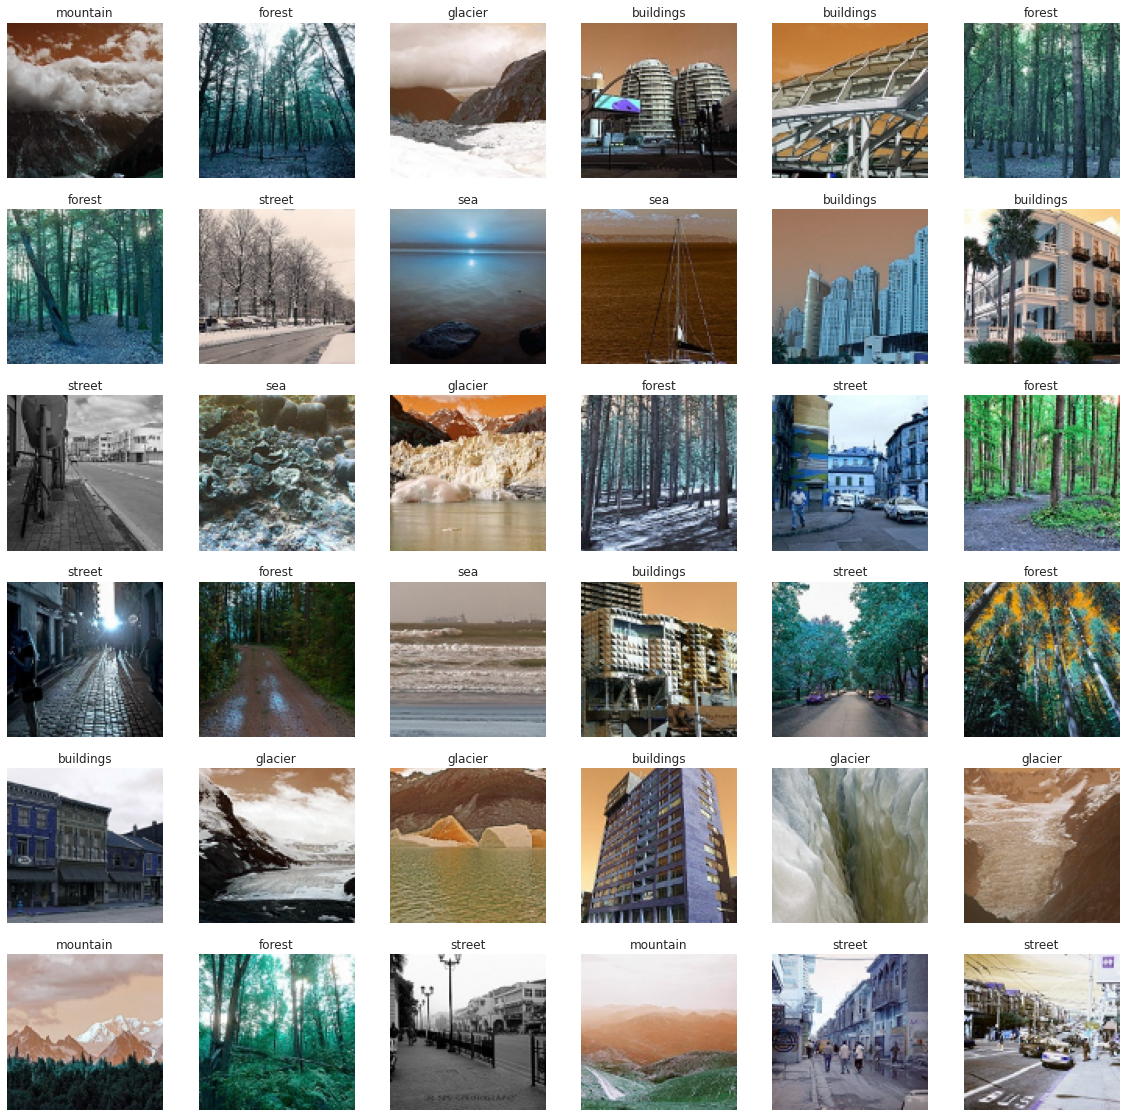

In [14]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(get_code(y_train[i]))

Great , now to repeat same steps exactly in test data

In [15]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str(testpath + 'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(get_num(folder))
        

In [16]:
print(f'we have {len(X_test)} items in X_test')

we have 3000 items in X_test


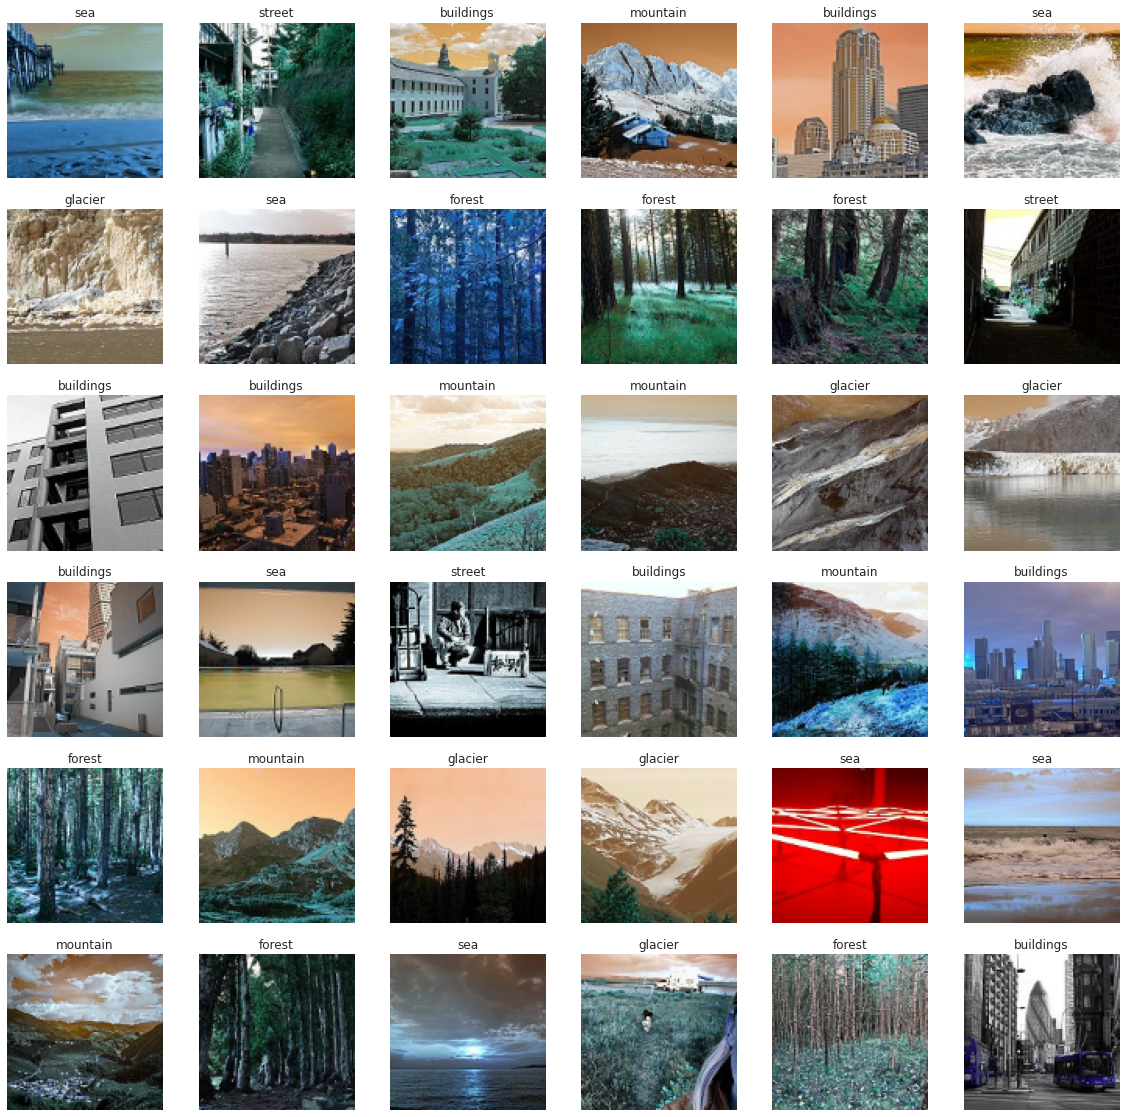

In [17]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(get_code(y_test[i]))

Also with Prediction data , without having title ofcourse

In [18]:
X_pred = []
files = gb.glob(pathname= str(predpath + 'seg_pred/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))       

In [19]:
print(f'we have {len(X_pred)} items in X_pred')

we have 7301 items in X_pred


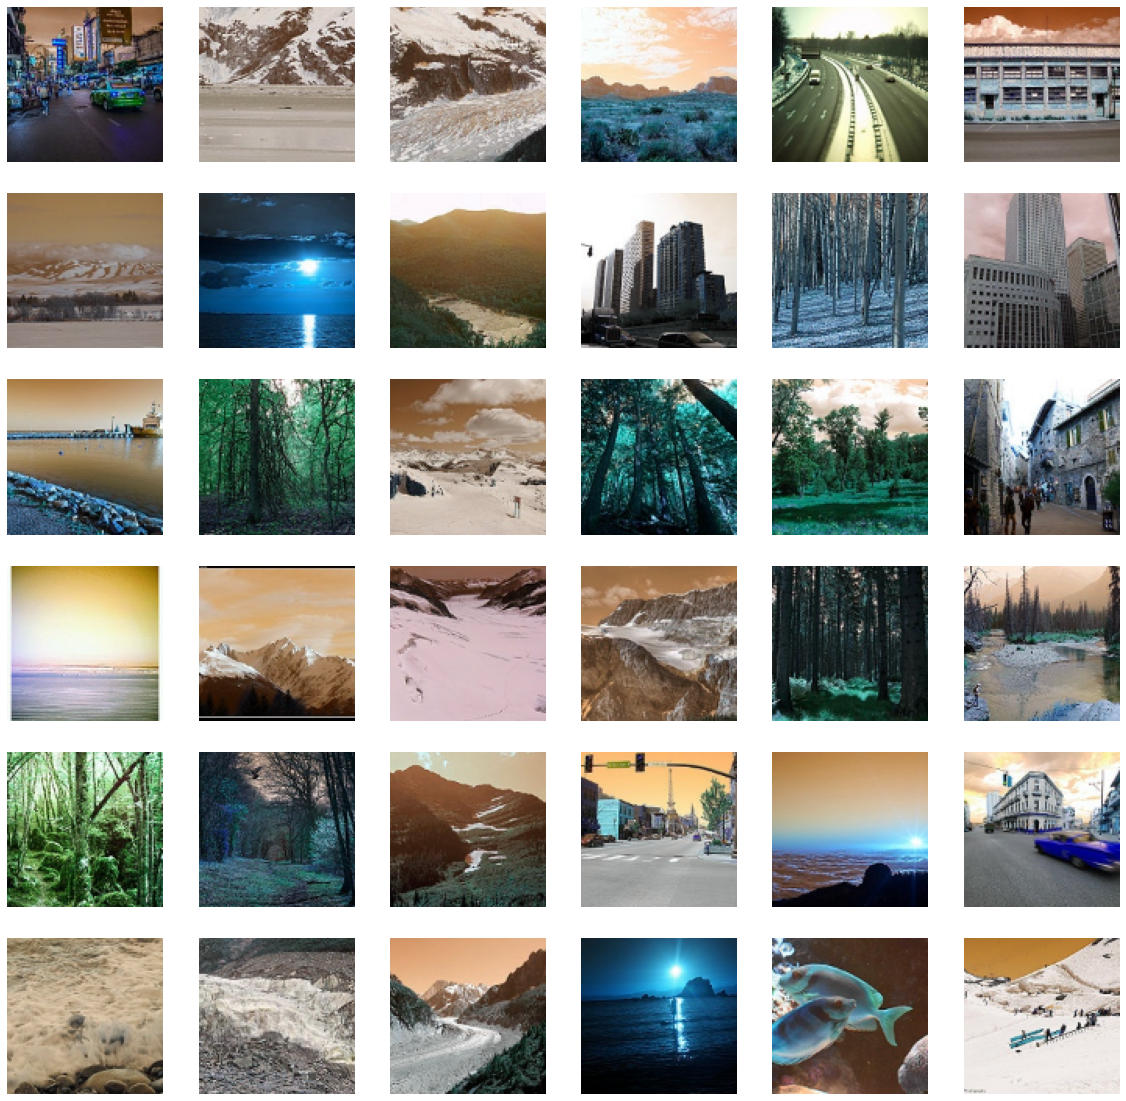

In [20]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

________

# Building The Model 

Now we need to build the model to train our data

First we convert the data into arrays using numpy

In [21]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (14034, 100, 100, 3)
X_test shape  is (3000, 100, 100, 3)
X_pred shape  is (7301, 100, 100, 3)
y_train shape  is (14034,)
y_test shape  is (3000,)


Now to build the CNN model by Keras , using Conv2D layers , MaxPooling & Dropouts and Dense layer

In [32]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model

restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(100,100,3))
output = restnet.layers[-1].output
outputs = keras.layers.Flatten()(output)
restnet = Model(restnet.input, outputs=outputs)
for layer in restnet.layers:
    layer.trainable = False
restnet.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [36]:
############### YOUR CODE HERE  ####################
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
KerasModel = keras.models.Sequential()
KerasModel.add(restnet)    

KerasModel.add(Dense(512, activation='relu', input_dim=(100,100,3)))
KerasModel.add(Dropout(0.3))
KerasModel.add(Dense(256, activation='relu'))
KerasModel.add(Dropout(0.3))
KerasModel.add(Dense(128, activation='relu'))
KerasModel.add(Dropout(0.3))    
KerasModel.add(Dense(64, activation='relu'))
KerasModel.add(Dropout(0.5))  
KerasModel.add(Dense(6, activation='softmax'))

####################################################

Now to compile the model , using adam optimizer , & sparse categorical crossentropy loss

In [37]:
############### YOUR CODE HERE  ####################

from keras.callbacks import Callback,ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 20,verbose = 1,factor = 0.50, min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)

KerasModel.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])




####################################################

So how the model looks like ? 

In [38]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Functional)         (None, 32768)             23587712  
_________________________________________________________________
dense_4 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (Non

Now to train the model , lets use 50 epochs now

In [39]:
############### YOUR CODE HERE  ####################
epochs = 30
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1,callbacks=[lrd,mcp,es])
####################################################

Epoch 1/30
220/220 [==============================] - 32s 123ms/step - loss: 2.0981 - accuracy: 0.5231
Epoch 2/30
220/220 [==============================] - 26s 120ms/step - loss: 0.5515 - accuracy: 0.8230
Epoch 3/30
220/220 [==============================] - 26s 120ms/step - loss: 0.4614 - accuracy: 0.8540
Epoch 4/30
220/220 [==============================] - 26s 120ms/step - loss: 0.3522 - accuracy: 0.8860
Epoch 5/30
220/220 [==============================] - 26s 120ms/step - loss: 0.3266 - accuracy: 0.8961
Epoch 6/30
220/220 [==============================] - 26s 120ms/step - loss: 0.2746 - accuracy: 0.9114
Epoch 7/30
220/220 [==============================] - 26s 120ms/step - loss: 0.2725 - accuracy: 0.9222
Epoch 8/30
220/220 [==============================] - 26s 120ms/step - loss: 0.1947 - accuracy: 0.9423
Epoch 9/30
220/220 [==============================] - 26s 120ms/step - loss: 0.1949 - accuracy: 0.9408
Epoch 10/30
220/220 [==============================] - 26s 120ms/step - l

How is the final loss & accuracy?


In [40]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

94/94 [==============================] - 9s 76ms/step - loss: 0.7431 - accuracy: 0.9053
Test Loss is 0.743056058883667
Test Accuracy is 0.9053333401679993



_______

Now to predict X_test

In [41]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (3000, 6)



Now it's time to predict X_Predict

In [42]:
y_result = KerasModel.predict(X_pred_array)

print('Prediction Shape is {}'.format(y_result.shape))

Prediction Shape is (7301, 6)


And show random redicted pictures & its predicting category


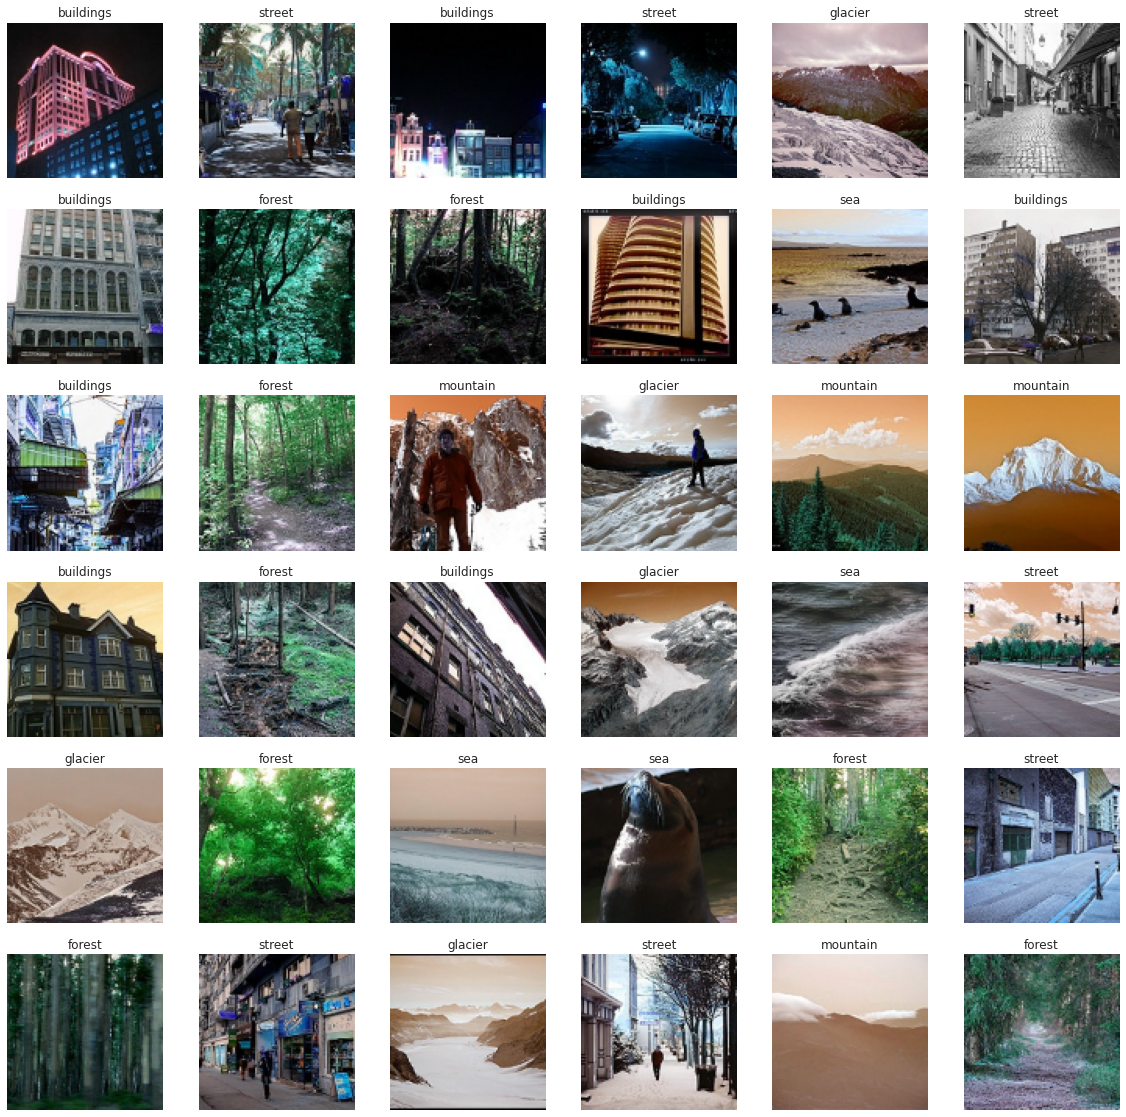

In [43]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(get_code(np.argmax(y_result[i])))

In [ ]:
#### BONUS POINTS FOR SOME TRANSFER LEARNING APPROACH

[Basics Of Transfer Learning](https://machinelearningmastery.com/transfer-learning-for-deep-learning/)